### Step 1:  Real World Data Set - Indian Stock Market Data(Case study of AXISBANK) - Data Engineering FinalProject

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2(a) - Load the dataset and perform some exploration

In [2]:
# Read data
data = pd.read_csv('AXISBANK.csv')
data.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [3]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836
5305,2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,1.655365e+15,232879.0,6786072.0,0.2949


In [50]:
# To explore the shape of the data
print(data.shape)

(5306, 15)


In [51]:
data.index

RangeIndex(start=0, stop=5306, step=1)

### Step 2(b)- Cleaning the Dataset and parsing dates

In [4]:
# To make date the starting index
# To set the starting index as the date
data =pd.read_csv('AXISBANK.csv', index_col=0)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [53]:
# To inspect our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


In [14]:
#Let's inspect the datatype of our date
data.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22', '2021-04-23',
       '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30'],
      dtype='object', name='Date', length=5306)

In [5]:
# Since date is an object datatype, we need to change it to float to avoid errors when plotting graphs
data =pd.read_csv('AXISBANK.csv', index_col=0, parse_dates=True)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [6]:
# Now let's confirm if our datetype has changed
data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=5306, freq=None)

In [7]:
# Now let's check for missing values
print(data.isnull().sum())

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


We see from above that most of the missing values are contained in the Trades, Deliverable Volume, and %Deliverables columns, but we do not need them for the scope of this project so we carry additional steps of cleaning our dataset in the next cell.

In [52]:
# We remove the columns with NaN values 
data = data.dropna(axis=1)
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Direction
Date,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,1
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,-1
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,-1
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,-1
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,-1
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,1
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,1


### Step 2(c) - Adding new columns to our dataset

In [51]:
# To determine the close price of tomorrow
data['Price1'] = data['Close'].shift(-1)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,MA2,MA3,MA4,MA5,MA6,MA10,MA20,MA50,MA200,Wealth
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,...,26.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,...,26.575,26.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,...,26.125,26.366667,26.450,NaN,NaN,NaN,NaN,NaN,NaN,-1.90
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,...,25.375,25.683333,25.975,26.12,NaN,NaN,NaN,NaN,NaN,-1.70


In [9]:
# To calculate price difference ie difference between close price of tomorrow and today
data['Profit'] = data['Price1'] - data['Close']
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price1,Profit
Date,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,26.85,0.15
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,26.30,-0.55
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,25.95,-0.35
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,24.80,-1.15
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,25.00,0.20


In [10]:
# To calculate daily return
data['DailyRt'] = data['Profit']/data['Close']
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt
Date,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,26.85,0.15,0.005618
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,26.30,-0.55,-0.020484
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,25.95,-0.35,-0.013308
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,24.80,-1.15,-0.044316
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,25.00,0.20,0.008065


In [12]:
# We use direction column to determine price difference
data['Direction'] = [1 if data.loc[i, 'Profit']>0 else -1 for i in data.index]
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt,Direction
Date,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,26.85,0.15,0.005618,1
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,26.30,-0.55,-0.020484,-1
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,25.95,-0.35,-0.013308,-1
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,24.80,-1.15,-0.044316,-1
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,25.00,0.20,0.008065,1


### Moving Average Calculation

### To calculate Moving average, I used the rolling method rather than the conventional method as indicative in the markdown formula. Please note that for higher Moving averages, I displayed the tail form of our datset as the heads are indicative of NaN 

In [13]:
# 2 days MA
#data['MA2'] = (data['Close'] + data['Prev Close'])/2
data['MA2'] = data['Close'].rolling(2).mean()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt,Direction,MA2
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,26.85,0.15,0.005618,1,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,26.30,-0.55,-0.020484,-1,26.775
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,25.95,-0.35,-0.013308,-1,26.575
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,24.80,-1.15,-0.044316,-1,26.125
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,25.00,0.20,0.008065,1,25.375


In [14]:
#To calcuate 3 days MA, we need to first create a column for 
#data['MA3'] = (data['Close'] + data['Prev Close'] + data['Close'].shift(2))/3
# Or we calculate directly using the rolling method.This method is quicker and as accurate as the conventional method:
data['MA3'] = data['Close'].rolling(3).mean()
data.head()
# Note that (data['Close'].shift(2)) is the closing price for 2days prior and would start with NaN the price values goes down by 
#2 rows.The same would be applicable if we calculate MA 3 and above.

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt,Direction,MA2,MA3
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,26.85,0.15,0.005618,1,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,26.30,-0.55,-0.020484,-1,26.775,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,25.95,-0.35,-0.013308,-1,26.575,26.616667
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,24.80,-1.15,-0.044316,-1,26.125,26.366667
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,25.00,0.20,0.008065,1,25.375,25.683333


In [15]:
# Calculate MA4
data['MA4'] = data['Close'].rolling(4).mean()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt,Direction,MA2,MA3,MA4
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,...,NaN,NaN,NaN,26.85,0.15,0.005618,1,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,...,NaN,NaN,NaN,26.30,-0.55,-0.020484,-1,26.775,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,...,NaN,NaN,NaN,25.95,-0.35,-0.013308,-1,26.575,26.616667,NaN
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,...,NaN,NaN,NaN,24.80,-1.15,-0.044316,-1,26.125,26.366667,26.450
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,...,NaN,NaN,NaN,25.00,0.20,0.008065,1,25.375,25.683333,25.975


In [16]:
# Next we calculate MA5, MA6 and proceed with higher MA calculations
data['MA5'] = data['Close'].rolling(5).mean()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Price1,Profit,DailyRt,Direction,MA2,MA3,MA4,MA5
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,...,NaN,NaN,26.85,0.15,0.005618,1,NaN,NaN,NaN,NaN
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,...,NaN,NaN,26.30,-0.55,-0.020484,-1,26.775,NaN,NaN,NaN
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,...,NaN,NaN,25.95,-0.35,-0.013308,-1,26.575,26.616667,NaN,NaN
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,...,NaN,NaN,24.80,-1.15,-0.044316,-1,26.125,26.366667,26.450,NaN
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,...,NaN,NaN,25.00,0.20,0.008065,1,25.375,25.683333,25.975,26.12


In [17]:
data['MA6'] = data['Close'].rolling(6).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,%Deliverble,Price1,Profit,DailyRt,Direction,MA2,MA3,MA4,MA5,MA6
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,...,0.2749,699.55,-0.90,-0.001285,-1,685.900,676.833333,670.5625,666.08,666.600000
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,...,0.3883,708.15,8.60,0.012294,1,700.000,690.450000,682.5125,676.36,671.658333
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,...,0.3302,719.40,11.25,0.015886,1,703.850,702.716667,694.8750,687.64,681.658333
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,...,0.2836,714.90,-4.50,-0.006255,-1,713.775,709.033333,706.8875,699.78,692.933333
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,...,0.2949,NaN,NaN,NaN,-1,717.150,714.150000,710.5000,708.49,702.300000


In [18]:
data['MA10'] = data['Close'].rolling(10).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Price1,Profit,DailyRt,Direction,MA2,MA3,MA4,MA5,MA6,MA10
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,...,699.55,-0.90,-0.001285,-1,685.900,676.833333,670.5625,666.08,666.600000,663.325
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,...,708.15,8.60,0.012294,1,700.000,690.450000,682.5125,676.36,671.658333,666.460
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,...,719.40,11.25,0.015886,1,703.850,702.716667,694.8750,687.64,681.658333,673.715
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,...,714.90,-4.50,-0.006255,-1,713.775,709.033333,706.8875,699.78,692.933333,679.555
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,...,NaN,NaN,NaN,-1,717.150,714.150000,710.5000,708.49,702.300000,684.160


In [19]:
data['MA20'] = data['Close'].rolling(20).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Profit,DailyRt,Direction,MA2,MA3,MA4,MA5,MA6,MA10,MA20
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,...,-0.90,-0.001285,-1,685.900,676.833333,670.5625,666.08,666.600000,663.325,678.5625
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,...,8.60,0.012294,1,700.000,690.450000,682.5125,676.36,671.658333,666.460,678.2200
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,...,11.25,0.015886,1,703.850,702.716667,694.8750,687.64,681.658333,673.715,678.8975
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,...,-4.50,-0.006255,-1,713.775,709.033333,706.8875,699.78,692.933333,679.555,679.9575
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,...,NaN,NaN,-1,717.150,714.150000,710.5000,708.49,702.300000,684.160,680.9350


In [20]:
data['MA50'] = data['Close'].rolling(50).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,DailyRt,Direction,MA2,MA3,MA4,MA5,MA6,MA10,MA20,MA50
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,...,-0.001285,-1,685.900,676.833333,670.5625,666.08,666.600000,663.325,678.5625,717.519
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,...,0.012294,1,700.000,690.450000,682.5125,676.36,671.658333,666.460,678.2200,716.660
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,...,0.015886,1,703.850,702.716667,694.8750,687.64,681.658333,673.715,678.8975,716.127
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,...,-0.006255,-1,713.775,709.033333,706.8875,699.78,692.933333,679.555,679.9575,715.713
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,...,NaN,-1,717.150,714.150000,710.5000,708.49,702.300000,684.160,680.9350,715.003


In [53]:
data['MA200'] = data['Close'].rolling(200).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Direction,MA200
Date,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,-1,578.84950
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,1,580.12650
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,1,581.39850
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,-1,582.79750
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,1.655365e+15,-1,584.17175


In [54]:
data['EMA200'] = data['Close'].ewm(span=10, adjust = False).mean()
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Direction,MA200,EMA200
Date,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,-1,578.84950,672.368174
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,1,580.12650,677.310324
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,1,581.39850,682.917538
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,-1,582.79750,689.550713
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,1.655365e+15,-1,584.17175,694.159674


In [22]:
# Cummulative wealth
data['Wealth'] = data['Profit'].cumsum()
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,MA2,MA3,MA4,MA5,MA6,MA10,MA20,MA50,MA200,Wealth
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15
2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,...,26.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40
2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,...,26.575,26.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75
2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,...,26.125,26.366667,26.450,NaN,NaN,NaN,NaN,NaN,NaN,-1.90
2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,...,25.375,25.683333,25.975,26.12,NaN,NaN,NaN,NaN,NaN,-1.70


In [23]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,MA2,MA3,MA4,MA5,MA6,MA10,MA20,MA50,MA200,Wealth
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,...,685.900,676.833333,670.5625,666.08,666.600000,663.325,678.5625,717.519,578.84950,672.85
2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,...,700.000,690.450000,682.5125,676.36,671.658333,666.460,678.2200,716.660,580.12650,681.45
2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,...,703.850,702.716667,694.8750,687.64,681.658333,673.715,678.8975,716.127,581.39850,692.70
2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,...,713.775,709.033333,706.8875,699.78,692.933333,679.555,679.9575,715.713,582.79750,688.20
2021-04-30,AXISBANK,EQ,719.40,705.0,729.85,705.00,711.65,714.90,719.36,23011654,...,717.150,714.150000,710.5000,708.49,702.300000,684.160,680.9350,715.003,584.17175,NaN


### Step 3 -  Computing Statistics for Numeric Columns and Plotting Graphs to Make Inferences

In [24]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,MA2,MA3,MA4,MA5,MA6,MA10,MA20,MA50,MA200,Wealth
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,...,5305.000000,5304.000000,5303.000000,5302.000000,5301.000000,5297.000000,5287.000000,5257.000000,5107.000000,5305.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,...,585.934477,585.974745,586.015512,586.056826,586.098428,586.273605,586.725491,587.964362,595.471735,559.299340
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,...,436.432432,436.259359,436.097808,435.940915,435.786283,435.190118,433.789788,429.679341,413.396574,436.623405
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,...,23.125000,23.516667,23.512500,23.640000,23.841667,24.195000,24.370000,25.612000,28.744000,-4.550000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,...,231.000000,231.308333,231.487500,231.717500,231.858333,232.520000,233.443750,234.429000,243.972625,204.350000
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,...,519.475000,519.375000,518.612500,518.645000,518.683333,519.415000,518.872500,523.470000,535.427250,492.850000
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,...,875.975000,875.687500,876.831250,877.685000,878.408333,885.665000,883.502500,901.586000,880.292125,850.650000
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,...,2019.825000,2013.233333,2009.100000,2006.440000,2002.991667,1968.145000,1933.617500,1902.544000,1433.011500,1996.650000


###### Graphs of MAs and Closing Price

<AxesSubplot:xlabel='Date'>

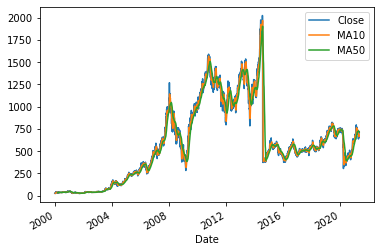

In [25]:
#We start by plotting the stock price with 2 MAs
data['Close'].plot (legend=True)
data['MA10'].plot (legend=True)
data['MA50'].plot (legend=True)

 # The above plot shows that both moving averages are indicative of a fast signal as they're both closer to the closing price

<AxesSubplot:xlabel='Date'>

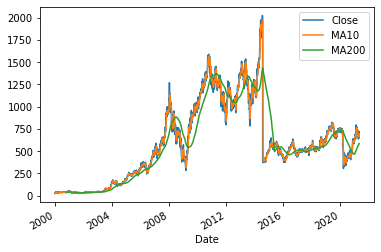

In [86]:
data['Close'].plot (legend=True)
data['MA10'].plot (legend=True)
data['MA200'].plot (legend=True)

# But when we increase the moving averages as shown in the figure above, we see that MA50 has a stronger signal compared to MA200 since it is closer to the Closing price¶

<AxesSubplot:xlabel='Date'>

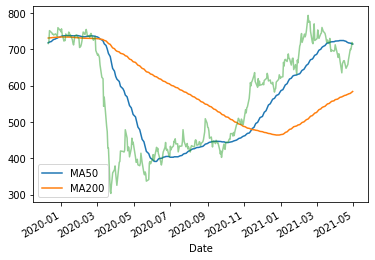

In [50]:
fig,ax=plt.subplots()
data[['MA50','MA200']].loc['2019-12-11':].plot(ax=ax)
data['Close'].loc['2019-12-11':].plot(ax=ax, alpha=0.5)

# The above plot specific to the last month in 2019 shows which moving average is closer to the actual price and we can see from the plot above that again MA50 is closer to the closing price forthe year 2019. 

<AxesSubplot:xlabel='Date'>

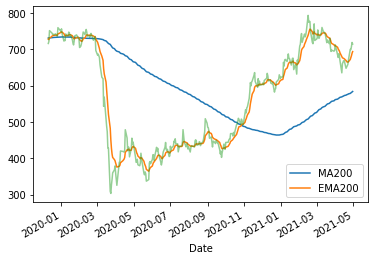

In [58]:
fig,ax=plt.subplots()
data[['MA200','EMA200']].loc['2019-12-11':].plot(ax=ax)
data['Close'].loc['2019-12-11':].plot(ax=ax, alpha=0.5)

# It can be observed from this plot that the exponential moving average moves faster, closer to and almost at the same pace with the actual closing price compared to the moving average. We can conclude that the EMA is more reactive to the closing price.

<AxesSubplot:>

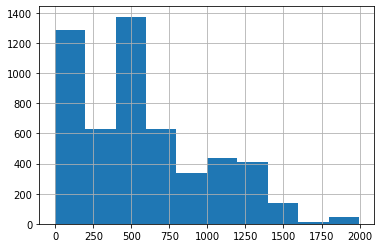

In [37]:
data['Wealth'].hist()

# From the histogram above, we can see that the distriution of Wealth is positively-skewed to the right which indicates that there were significant reduction in wealth generation from 1,390 Rupees to 2,000 Rupees. This could be that despite share prices dropping in 2016, fewer share holders enjoyed tremendous gain in the 2,000 bracket compared to those in the 1,380 bracket.

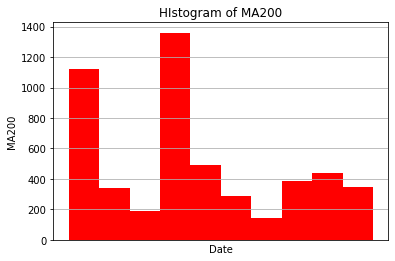

In [33]:
plot = plt.hist(data["MA200"], facecolor='red')


plt.xlabel('Date')
plt.ylabel('MA200')
plt.title('HIstogram of MA200')
plt.xticks(np.arange(300, 101, step=10))
plt.grid(True)
plt.show()

<AxesSubplot:>

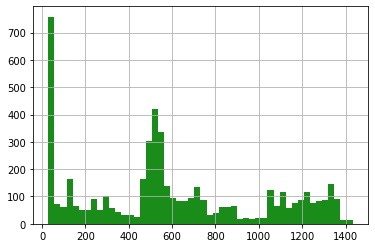

In [41]:
fig, ax = plt.subplots()
data['MA200'].hist(ax=ax, bins=50, alpha=0.9, color='green')

#### Step 4 - Plot of Prices

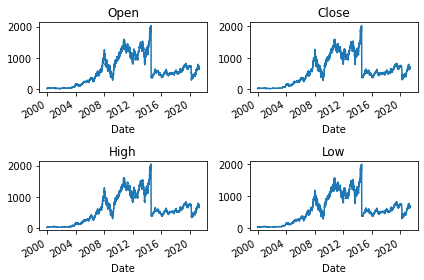

In [93]:
fig, ax = plt.subplots(2, 2)
data['Open'].plot(ax=ax[0, 0], title = 'Open')
data['Close'].plot(ax=ax[0, 1], title = 'Close')
data['High'].plot(ax=ax[1, 0], title = 'High')
data['Low'].plot(ax=ax[1, 1], title = 'Low')
plt.tight_layout()

# The above shows the description of Prices at the opening,Close, High, and Low stages respectively. These are all indicative of similar trends and showed that the best time to trade shares was between 2014/2015

#### Plot of Profit and Daily Returns

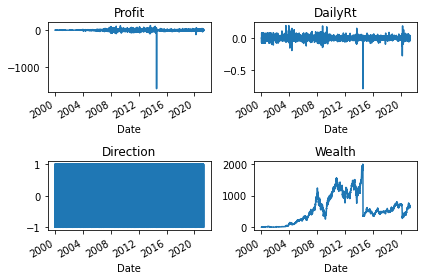

In [92]:
fig, ax = plt.subplots(2, 2)
data['Profit'].plot(ax=ax[0, 0], title = 'Profit')
data['DailyRt'].plot(ax=ax[0, 1], title = 'DailyRt')
data['Direction'].plot(ax=ax[1, 0], title = 'Direction')
data['Wealth'].plot(ax=ax[1, 1], title = 'Wealth')
plt.tight_layout()

# 1. Although profit was at an all time high from 2000-2014, there was a sharp loss in 2016 which led the Axxis Bank stock to crash briefly and experience a rebound uptill 2000.
# 2. Daily Return just like profit was constant showing positive growth but dipped in 2015 in the negative margin.
# 3. Direction is a function of profit and runs between -1<D<1. if positive, then it'sindicative of a gain and vis-a-vis if negative.
# 4. Wealth gradually grew from 2000-2009 and dropped in 2011( during the attack on world trade centre as most bussinesses were negatively impacted globally).In 2012, it begain to grow steadily with minor fluctautions until 2015 when it dropped sharply leading to huge loss and increased interest rates. It has been gradually growing and at a rate higher than when it was first measured in 2000.


#### Volume of stock sold in 2016

<AxesSubplot:xlabel='Date'>

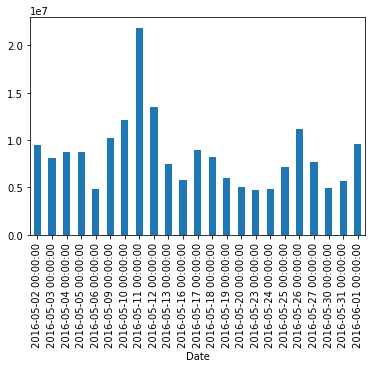

In [94]:
fig, ax = plt.subplots()
data['Volume'].loc['2016-05-01':'2016-06-01'].plot.bar(ax=ax)

# Since visualizing the total volume of stock traded from 2000-2020 would be cumbersome and not very visually appealing except we adjust the plot size, i limited the scope to the one month trade from May 1,2016 to June 1, 2016. The bar graph shows that the highest volume of stocks were traded on May 11th and 12th. The least being May 6th which was on a weekend. This implies in real life, fewer stocks are being traded on weekends compared to the start of the week.

<AxesSubplot:xlabel='Date'>

<Figure size 2160x1440 with 0 Axes>

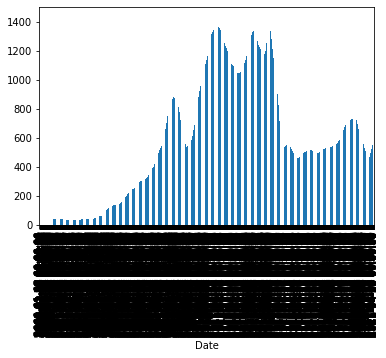

In [34]:
plt.figure(figsize=(30,20))
fig, ax = plt.subplots()
data['MA200'].plot.bar(ax=ax)

<AxesSubplot:>

<Figure size 1584x720 with 0 Axes>

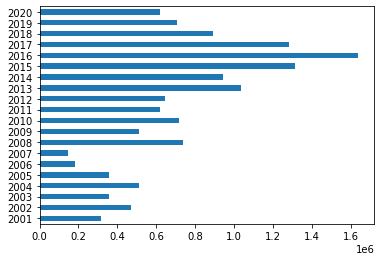

In [4]:
plt.figure(figsize=(22,10))
fig, ax = plt.subplots()
data['Volume'].loc['2000-05-01':'2020-06-01'].plot.barh(ax=ax)

# The above plot shows the the total volume of stock traded by Axxis bank from 2000- 2020,and is indicator that the highest volumes were traded in the year 2016,2015,and 2017 despite experiencing a huge drop in share profit in 2016 from previous graphs above. 

### Relationship between Profit and DailyRt

<AxesSubplot:xlabel='Date'>

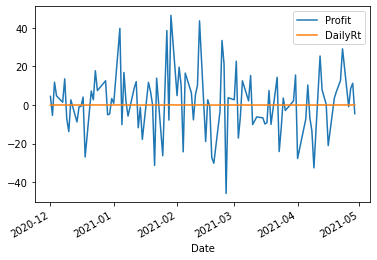

In [51]:
# To show the relationship between Profit and DailyRt
fig, ax = plt.subplots()
data[['Profit', 'DailyRt']].loc['2020-12-01' :].plot(ax=ax)

# From the above, we see that daily return was constant. Axxis Bank is predicted to gain the most in February of 2021. And would be followed by a sharp loss in the following month which is March. There would be fluctuations in stock prices in the following months but not as steep as what was experienced in March.

## Step 5: Summary and Inferences

# From the above Case study of Axis Bank Stock Prices, i learnt the following:
# 1. Certain factors can impact stock prices as indicated in each of the plots particularly year 2011. Wealth gradually grew from 2000-2009 and dropped in 2011( during the attack on World Trade Centre as most businesses were negatively impacted globally).In 2012, it begain to grow steadily with minor fluctuations. In 2015, stocks prices dropped sharply leading to huge loss and increased interest rates. It has been gradually growing and at a rate higher than when it was first measured in 2000.
# 2. Stock thrives more on certain days compared to others. On weekends, stock prices increase leading to fewer volume of stocks sold and decreases at the start of the week leading to more volume of stocks sold. 
# 3. It is easier to use rolling method in calcuating moving averages compared to the conventional style.
# 4. Fast signal shows the price that's closer to the Closing price when compared to another price say the calculated Moving average price.
# 5. Not cleaning our dataset would have led to calculation errors.